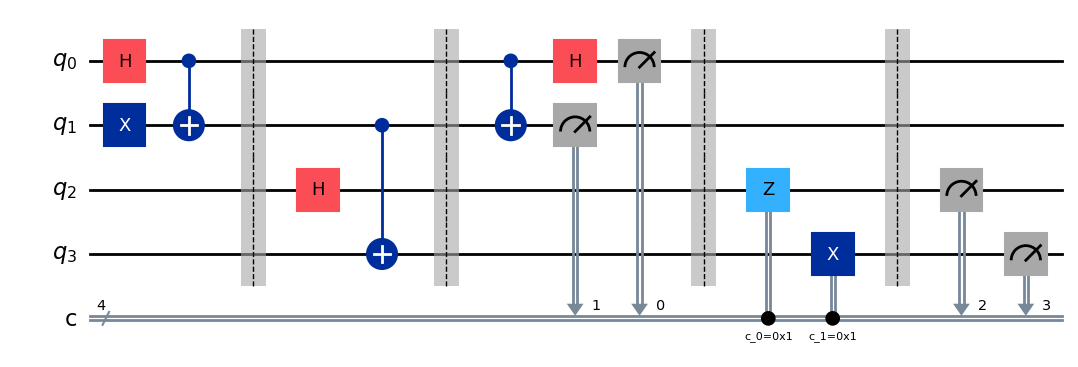

In [15]:
from qiskit import QuantumCircuit

circ = QuantumCircuit(4, 4)
circ.h(0)
circ.x(1)
circ.cx(0, 1)

circ.barrier()

circ.h(2)
circ.cx(1, 3)

circ.barrier()

circ.cx(0, 1)
circ.h(0)

circ.measure(0, 0)
circ.measure(1, 1)

circ.barrier()

circ.z(2).c_if(0, 1)
circ.x(3).c_if(1, 1)

circ.barrier()

circ.measure(2, 2)
circ.measure(3, 3)

circ.draw(output='mpl')

In [ ]:
from qiskit import generate_preset_pass_manager
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler

service = QiskitRuntimeService()
backend = service.backend('ibm_rensselaer')

pm = generate_preset_pass_manager(optimization_level=3, backend=backend)
isa_circuit = pm.run(circ)

simulator = AerSimulator()

sampler = Sampler(mode=simulator)
job = sampler.run([circ])
print(f"Job ID: {job.job_id()}")

In [ ]:
result = service.job('').result()